##**Loading Dataset** 

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id': '1qfxQa0QgwYN204DNbTintMCUK9aCKB4z'})
downloaded.GetContentFile('Zameendata.xlsx')

In [11]:
#import Data
dataset = pd.read_excel('Zameendata.xlsx')
dataset.head(19)

,property_type,price,city,latitude,longitude,bedrooms,bathrooms,AREA(Marla),purpose,date_added
0,Room,1000,Islamabad,33.720413,73.056493,1,1,1.0,For Rent,4/5/2019
1,Room,1800,Rawalpindi,33.644028,73.082916,0,0,1.0,For Rent,12/10/2018
2,Room,3000,Rawalpindi,33.613077,73.065555,1,1,0.6,For Rent,2/17/2019
3,Room,3000,Faisalabad,31.398118,73.096833,0,0,10.0,For Rent,3/19/2019
4,Flat,3000,Faisalabad,31.444042,73.088565,2,1,2.0,For Rent,3/19/2019
5,Room,4000,Rawalpindi,33.570881,73.145235,0,0,1.0,For Rent,2/17/2019
6,Room,4000,Rawalpindi,33.543125,72.989460,1,1,2.0,For Rent,5/6/2019
7,Room,4000,Islamabad,33.666470,73.153934,1,1,0.4,For Rent,6/27/2019
8,Room,4500,Rawalpindi,33.643518,73.070519,1,1,10.0,For Rent,3/19/2019
9,Flat,5000,Rawalpindi,33.549693,73.130536,1,1,2.7,For Rent,7/13/2019


In [12]:
#filter = dataset["city"]=="Karachi"
#housing_data=dataset.where(filter, inplace = False)

In [13]:
#filter = dataset["purpose"]=="For Sale"
#housing_data=housing_data.where(filter, inplace = False)

In [14]:
#filter = housing_data["property_type"]=="House"
#housing_data=housing_data.where(filter, inplace = False)

In [15]:
#housing_data.dropna(how='any',inplace=True)

In [16]:
#housing_data.head(2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


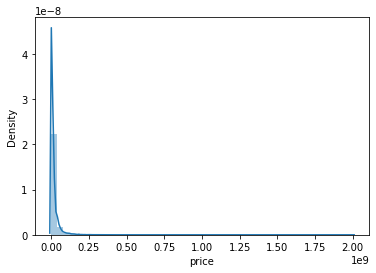

In [17]:
sns.distplot(dataset['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


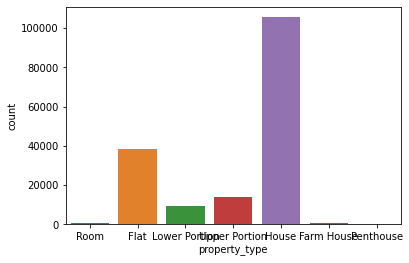

In [18]:
sns.countplot(dataset['property_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


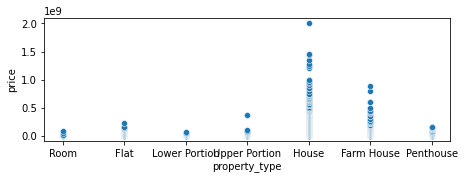

In [21]:
#visualizing square footage of (property_type and price)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(dataset['property_type'], dataset['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


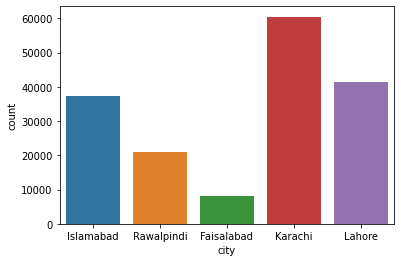

In [22]:
sns.countplot(dataset['city'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


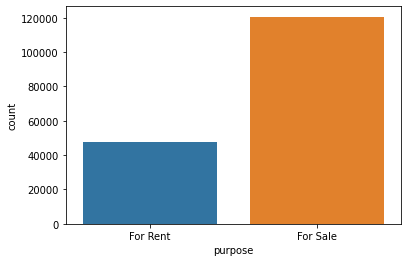

In [23]:
sns.countplot(dataset['purpose'])

## **DATA PREPROCESSING**




In [27]:
#categorical data
categorical_cols = ['property_type', 'city', 'purpose'] 

#OneHotEncoding
housing_df = pd.get_dummies(dataset, columns = categorical_cols)
housing_df.head()

,price,latitude,longitude,bedrooms,bathrooms,AREA(Marla),date_added,property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale
0,1000,33.720413,73.056493,1,1,1.0,4/5/2019,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,1800,33.644028,73.082916,0,0,1.0,12/10/2018,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,3000,33.613077,73.065555,1,1,0.6,2/17/2019,0,0,0,0,0,1,0,0,0,0,0,1,1,0
3,3000,31.398118,73.096833,0,0,10.0,3/19/2019,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,3000,31.444042,73.088565,2,1,2.0,3/19/2019,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [28]:
housing_df['date'] = pd.to_datetime(housing_df['date_added'])
housing_df['month'] = housing_df['date'].apply(lambda x: x.month)
housing_df['year'] = housing_df['date'].apply(lambda x: x.year)

In [29]:
housing_data=housing_df.drop(['date_added','date'],axis=1)
housing_data.head()

,price,latitude,longitude,bedrooms,bathrooms,AREA(Marla),property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale,month,year
0,1000,33.720413,73.056493,1,1,1.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,4,2019
1,1800,33.644028,73.082916,0,0,1.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,12,2018
2,3000,33.613077,73.065555,1,1,0.6,0,0,0,0,0,1,0,0,0,0,0,1,1,0,2,2019
3,3000,31.398118,73.096833,0,0,10.0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,3,2019
4,3000,31.444042,73.088565,2,1,2.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,3,2019


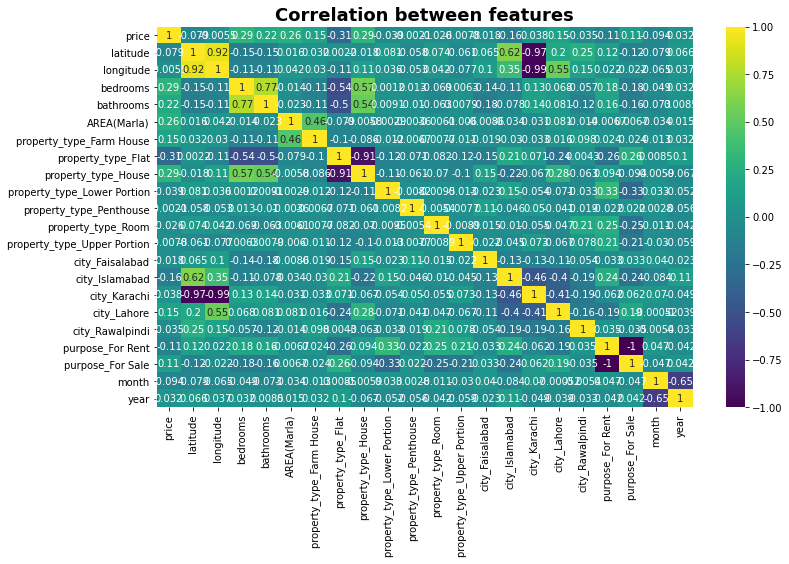

In [34]:
train_corr=housing_data.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(train_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

**Data Cleaning**

In [30]:
#checking for any duplicates in the data
housing_data.duplicated().sum()
# check if there are any Null values
housing_data.isnull().sum()
#checking for any duplicates in the data
housing_data.duplicated().sum()
# sorting by first name
housing_data.sort_values("price", inplace = True)
  # dropping ALL duplicte values
housing_data.drop_duplicates(subset ="price",
                     keep = False , inplace = True)

In [31]:
#checking for any duplicates in the data
housing_data.duplicated().sum()

0

## **EXPLORATORY DATA ANALYSIS**


In [ ]:
housing_data.info()
housing_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 168426
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        640 non-null    int64  
 1   latitude                     640 non-null    float64
 2   longitude                    640 non-null    float64
 3   bedrooms                     640 non-null    int64  
 4   bathrooms                    640 non-null    int64  
 5   AREA(Marla)                  640 non-null    float64
 6   property_type_Farm House     640 non-null    uint8  
 7   property_type_Flat           640 non-null    uint8  
 8   property_type_House          640 non-null    uint8  
 9   property_type_Lower Portion  640 non-null    uint8  
 10  property_type_Penthouse      640 non-null    uint8  
 11  property_type_Room           640 non-null    uint8  
 12  property_type_Upper Portion  640 non-null    uint8  
 13  city_Faisalabad  

,price,latitude,longitude,bedrooms,bathrooms,AREA(Marla),property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale,month,year
count,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,6.065475e+07,30.170884,71.450645,2.864063,2.703125,29.558906,0.009375,0.514062,0.439063,0.014063,0.004687,0.006250,0.012500,0.035937,0.309375,0.323437,0.259375,0.071875,0.093750,0.906250,6.254688,2018.904687
std,1.830735e+08,3.728662,3.064453,2.437055,2.444883,330.778552,0.096445,0.500193,0.496661,0.117841,0.068358,0.078871,0.111189,0.186280,0.462598,0.468154,0.438635,0.258483,0.291709,0.291709,1.917503,0.293876
min,1.000000e+03,24.774554,66.976426,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000
25%,1.936250e+06,25.050147,67.106600,1.000000,1.000000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,2019.000000
50%,5.233500e+06,31.462493,73.074392,2.000000,2.000000,4.800000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,2019.000000
75%,3.687500e+07,33.605838,74.181014,4.000000,4.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,7.000000,2019.000000
max,2.000000e+09,33.824600,74.478550,25.000000,10.000000,8320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,2019.000000


In [ ]:
housing_data.head(2)

,price,latitude,longitude,bedrooms,bathrooms,AREA(Marla),property_type_Farm House,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi,purpose_For Rent,purpose_For Sale,month,year
0,1000,33.720413,73.056493,1,1,1.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,4,2019
1,1800,33.644028,73.082916,0,0,1.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,12,2018


### **Spilliting into Training & Testing Data**

In [32]:
X = housing_data.iloc[:, 2:].values 
 
Y = housing_data.iloc[:, 1].values 

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20) 

In [ ]:
from sklearn.preprocessing import StandardScaler 
 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [ ]:
import tensorflow.keras as keras
import tensorflow as tf

In [ ]:
X_train.shape

(512, 20)

## **MODEL ESTIMATION**

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mae')

In [ ]:
model.fit(X_train,Y_train,
          validation_data=(X_test,Y_test), 
          batch_size=256,
          epochs=800)

Epoch 1/800
2/2 [==============================] - 1s 169ms/step - loss: 30.5279 - val_loss: 30.6398
Epoch 2/800
2/2 [==============================] - 0s 38ms/step - loss: 30.4334 - val_loss: 30.5085
Epoch 3/800
2/2 [==============================] - 0s 39ms/step - loss: 30.2087 - val_loss: 30.4115
Epoch 4/800
2/2 [==============================] - 0s 37ms/step - loss: 30.2054 - val_loss: 30.3300
Epoch 5/800
2/2 [==============================] - 0s 37ms/step - loss: 30.0743 - val_loss: 30.2542
Epoch 6/800
2/2 [==============================] - 0s 33ms/step - loss: 30.1163 - val_loss: 30.1770
Epoch 7/800
2/2 [==============================] - 0s 36ms/step - loss: 29.9520 - val_loss: 30.0955
Epoch 8/800
2/2 [==============================] - 0s 36ms/step - loss: 29.8979 - val_loss: 30.0078
Epoch 9/800
2/2 [==============================] - 0s 38ms/step - loss: 29.8703 - val_loss: 29.9236
Epoch 10/800
2/2 [==============================] - 0s 36ms/step - loss: 29.7366 - val_loss: 29.840

MAE: 0.3428708518466953
MSE: 0.22588211350443052
RMSE: 0.4752705687336746
VarScore: 0.9873678280181515


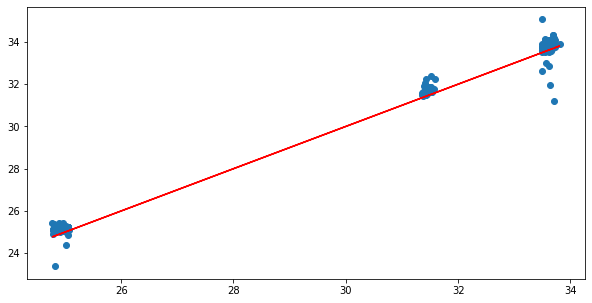

In [ ]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(Y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(Y_test,y_pred)
# Perfect predictions
plt.plot(Y_test,Y_test,'r')